# Trending Youtube Video Statistics (US only)

# Latar Belakang

Sebuah perusahaan US menerbitkan produk baru dan ingin memperkenalkan produk tersebut kepada masyarakat US melalui media Youtube. Perusahaan ingin juga meningkatkan brand image kepada masyarakat US sehingga perusahaan tersebut ingin memproduksi video trending yang memiliki banyak viewers dan likes.

# Pernyataan Masalah

Perusahaan ingin memperkenalkan produk baru dan meningkatkan brand image perusahaan tersebut dengan membuat video yang akan di tayangkan di youtube. Informasi ini dapat membantu perusahaan mengurangi jumlah video yang akan dibuat dan meningkatkan akurasi tujuan video.
Dari permasalahan tersebut, timbul sebuah pertanyaan "Faktor apa saja yang mempengaruhi suatu video sehingga dapat menjadi video trending yang memiliki banyak views (untuk memperkenalkan produk baru) dan likes (brand image) di youtube?"

# Data preparation (Data Understanding, Cleaning, wrangling)

In [869]:
#Starter data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kstest, kruskal


df = pd.read_csv(r'C:\Users\Ilham Muhammaddin\visual data purwadhika\capstone modul 2\USvideos.csv',parse_dates=['publish_time'])
df1= pd.read_csv(r'C:\Users\Ilham Muhammaddin\visual data purwadhika\capstone modul 2\US_category_id.csv')



In [870]:
#dataset df
print(f'jumlah baris dan kolom pada dataset df {df.shape}')
df.info()

jumlah baris dan kolom pada dataset df (40949, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64          

In [871]:
#dataset df1
print(f'jumlah baris dan kolom pada dataset df1 {df1.shape}')
df1.info()

jumlah baris dan kolom pada dataset df1 (32, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kind                        1 non-null      object
 1   etag                        1 non-null      object
 2   items__kind                 32 non-null     object
 3   items__etag                 32 non-null     object
 4   items__id                   32 non-null     int64 
 5   items__snippet__channelId   32 non-null     object
 6   items__snippet__title       32 non-null     object
 7   items__snippet__assignable  32 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 1.9+ KB


In [872]:
pd.set_option('display.max_colwidth', -1)
listitem1 = []
for i in df.columns :
    listitem1.append( [i, df[i].nunique(), df[i].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listitem1)
tabel1Desc

C:\Users\Ilham Muhammaddin\AppData\Local\Temp\ipykernel_13896\3480325628.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Column Name  Number of Unique  \
0   video_id                6351               
1   trending_date           205                
2   title                   6455               
3   channel_title           2207               
4   category_id             16                 
5   publish_time            6269               
6   tags                    6055               
7   views                   40478              
8   likes                   29850              
9   dislikes                8516               
10  comment_count           13773              
11  thumbnail_link          6352               
12  comments_disabled       2                  
13  ratings_disabled        2                  
14  video_error_or_removed  2                  
15  description             6901               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [873]:
listitem2 = []
for i in df1.columns :
    listitem2.append( [i, df1[i].nunique(), df1[i].unique()])

tabel2Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listitem2)
tabel2Desc

,Column Name,Number of Unique,Unique Sample
0,kind,1,"[youtube#videoCategoryListResponse, nan]"
1,etag,1,"[""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"", nan]"
2,items__kind,1,[youtube#videoCategory]
3,items__etag,32,"[""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"", ""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"", ""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"", ""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"", ""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec"", ""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZbpqe68Sy_OE"", ""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf_DkLN8CouA"", ""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFSw2zinhn2wM"", ""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf8aba249tdM"", ""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZbNIytUQDRo"", ""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5yaga_Aqtwz8M"", ""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3vXSLVK5E_s"", ""m2yskBQFythfE4irbTIeOgYYfBU/QiLK0ZIrFoORdk_g2l_XR_ECjDc"", ""m2yskBQFythfE4irbTIeOgYYfBU/r6Ck6Z0_L0rG37VJQR200SGNA_w"", ""m2yskBQFythfE4irbTIeOgYYfBU/EoYkczo9I3RCf96RveKTOgOPkUM"", ""m2yskBQFythfE4irbTIeOgYYfBU/w5HjcTD82G_XA3xBctS30zS-JpQ"", ""m2yskBQFythfE4irbTIeOgYYfBU/SalkJoBWq_smSEqiAx_qyri6Wa8"", ""m2yskBQFythfE4irbTIeOgYYfBU/lL7uWDr_071CHxifjYG1tJrp4Uo"", ""m2yskBQFythfE4irbTIeOgYYfBU/WnuVfjO-PyFLO7NTRQIbrGE62nk"", ""m2yskBQFythfE4irbTIeOgYYfBU/ctpH2hGA_UZ3volJT_FTlOg9M00"", ""m2yskBQFythfE4irbTIeOgYYfBU/L0kR3-g1BAo5UD1PLVbQ7LkkDtQ"", ""m2yskBQFythfE4irbTIeOgYYfBU/pUZOAC_s9sfiwar639qr_wAB-aI"", ""m2yskBQFythfE4irbTIeOgYYfBU/Xb5JLhtyNRN3AQq021Ds-OV50Jk"", ""m2yskBQFythfE4irbTIeOgYYfBU/u8WXzF4HIhtEi805__sqjuA4lEk"", ""m2yskBQFythfE4irbTIeOgYYfBU/D04PP4Gr7wc4IV_O9G66Z4A8KWQ"", ""m2yskBQFythfE4irbTIeOgYYfBU/i5-_AceGXQCEEMWU0V8CcQm_vLQ"", ""m2yskBQFythfE4irbTIeOgYYfBU/rtlxd0zOixA9QHdIZB26-St5qgQ"", ""m2yskBQFythfE4irbTIeOgYYfBU/N1TrDFLRppxZgBowCJfJCvh0Dpg"", ""m2yskBQFythfE4irbTIeOgYYfBU/7UMGi6zRySqXopr_rv4sZq6Za2E"", ""m2yskBQFythfE4irbTIeOgYYfBU/RScXhi324h8usyIetreAVb-uKeM"", ""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiGVrFsuFsd0A"", ""m2yskBQFythfE4irbTIeOgYYfBU/x5NxSf5fz8hn4loSN4rvhwzD_pY""]"
4,items__id,32,"[1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]"
5,items__snippet__channelId,1,[UCBR8-60-B28hp2BmDPdntcQ]
6,items__snippet__title,31,"[Film & Animation, Autos & Vehicles, Music, Pets & Animals, Sports, Short Movies, Travel & Events, Gaming, Videoblogging, People & Blogs, Comedy, Entertainment, News & Politics, Howto & Style, Education, Science & Technology, Nonprofits & Activism, Movies, Anime/Animation, Action/Adventure, Classics, Documentary, Drama, Family, Foreign, Horror, Sci-Fi/Fantasy, Thriller, Shorts, Shows, Trailers]"
7,items__snippet__assignable,2,"[True, False]"


Terdapat 16 kolom pada data set 'df' dengan isi data sebagai berikut :

1. video_id : ID untuk setiap video
2. trending_date : Detail tanggal saat suatu video trending (hari, bulan, tahun) pada suatu video dengan status trending (YY.DD.MM)
3. title : Judul video
4. channel_title : Nama channel untuk suatu video
5. category_id : ID untuk kategori suatu video (music, comedy, sport, gaming, dll)
6. publish_time : detail waktu penerbitan video (tanggal hari bulan tahun, dan jam menit detik) 
7. tags : kata kunci deskriptif yang dapat ditambahkan ke video untuk membantu penonton menemukan video tertentu
8. views : total jumlah berapa kali video tersebut di tonton
9. likes : total jumlah user youtube yang memberikan reaksi suka pada suatu video
10. dislikes : total jumlah user youtube yang memberikan reaksi tidak suka pada suatu video
11. comment_count : total jumlah comment yang diberikan user youtube pada suatu video
12. thumbnail_link : link website untuk menampilkan gambar tampilan awal suatu video
13. comment_disabled : status ketersediaan kolom komentar yang di sediakan creator video (true, false)
14. rating_disabled : status ketersediaan rating (like, dislike) yang di sediakan creator video (true. false)
15. video_error_or_removed : status video tersebut apakah lancar dan aman (false) atau video nya error atau dihapus (true)
16. description : penjelasan detail / tambahan yang disampaikan kreator video untuk penonton

dan terdapat 8 kolom pada data set 'df1' dengan isi data sebagai berikut :
1. kind : penamaan jenis data, pada df1 hanya terdapat 1 data
2. etag : tag untuk 'jenis data', pada df1 hanya terdapat 1 data
3. items_kind : penamaan lebih khusus jenis data, pada df1 isi datanya sama semua
4. items_etag : tag untuk setiap kategori video
5. items_id : id untuk setiap kategori video (variabel ini dapat digunakan fungsi join pada data set df)
6. items_snippet_channelld : channel snippet (untuk keperluan SEO)
7. items_snippet_title : nama-nama kategori video
8. items_snippet_assignable : fitur SEO dikhususkan untuk suatu kategori video (true, false)

# Missing value

In [874]:
#Missing value pada data set df
df.isna().sum()

video_id                  0  
trending_date             0  
title                     0  
channel_title             0  
category_id               0  
publish_time              0  
tags                      0  
views                     0  
likes                     0  
dislikes                  0  
comment_count             0  
thumbnail_link            0  
comments_disabled         0  
ratings_disabled          0  
video_error_or_removed    0  
description               570
dtype: int64

In [875]:
#Missing value pada data set df1
df1.isna().sum()

kind                          31
etag                          31
items__kind                   0 
items__etag                   0 
items__id                     0 
items__snippet__channelId     0 
items__snippet__title         0 
items__snippet__assignable    0 
dtype: int64

pada data set df, terdapat kolom publish_time yang dimana menampilkan detail waktu penerbitan video, dari kolom ini saya akan membuat 2 kolom baru yaitu publish_day (berisikan hari apa di terbitkan video), dan publish_hour (berisikan jam di terbitkan video) untuk mempermudah analisis dan visualisasi.


In [876]:
x = df['publish_time']
hari = x.dt.day_name()
jam = x.dt.hour
df.insert(6,column='publish_day', value=hari)
df.insert(7, column='publish_hour', value=jam)


df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,publish_day,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,Monday,17,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.


Dari keterangan Missing value data set df, menurut saya dapat ditambah kan kolom baru terkait deskripsi untuk membantu analisis. 'description_flag' menampilkan status pada suatu video menggunakan deskripsi atau tidak (true, false). setelah itu saya akan mengisi '-' untuk missing values pada kolom 'description' 

In [877]:
#membuat kolom description flag(data wrangling)
df['description_flag'] = pd.notna(df['description'])
df['description'] = df['description'].fillna('-')


df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,publish_day,publish_hour,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,description_flag
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,Friday,13,"aarons animals|""aarons""|""animals""|""cat""|""cats""|""kitten""|""kittens""|""prince michael""|""prince""|""michael""|""laser""|""olympics""|""red""|""dream""",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,True
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,Friday,1,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,-,False
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER BASED ON HER FEATURES: BTS! |bradmondo,Brad Mondo,24,2018-05-18 17:34:22+00:00,Friday,17,"I gave safiya nygaard a perfect hair makeover based on her features: bts|""brad mondo""|""safiya and tyler""|""safiya nygaard""|""hair transformation""|""makeover""|""I got a perfect makeover based on my features""|""bts""|""hairdresser reacts""|""before and after""|""hair""|""makeup""|""transformation""|""ANTM""|""what not to wear""|""the ideal haircut and color for your face""|""safiya buzzfeed""|""color for your skin tone""|""haircut for your face shape""|""tutorial""|""balayage""|""hair stylist""|""hair color""|""hair tutorial""",1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in this video! She was serving major lewks!SAFIYAS VIDEO▷https://goo.gl/C92AmbSHOP MY LIMITED EDITION HOODIE!▷ https://goo.gl/VN6tVD LET'S BE BFFS!INSTAGRAM ▷ https://www.instagram.com/bradmondonyc/TWITTER ▷ https://twitter.com/bradmondonycFACEBOOK ▷ https://www.facebook.com/bradmondonyc/WANNA SEE MORE OF MY FACE? ▷ https://goo.gl/QjHDAuWANNA SEE MY LAST VIDEO? ▷ https://goo.gl/exP6gWFILMING EQUIPMENT: UMBRELLA LIGHTS▷ http://amzn.to/2qNy9K4RING LIGHT▷ http://amzn.to/2Erv1p9CAMERA▷ http://amzn.to/2EsXQRYCAMERA LENS▷http://amzn.to/2DdlN0rTRIPOD▷ http://amzn.to/2mePXbDMIC▷ http://amzn.to/2Bpt9PHBACKGROUND PAPER▷http://amzn.to/2FkKKHXWANT AN INTRO LIKE MINE? CONTACT▷www.marcelsaleta.comDON'T FORGET TO LIVE YOUR EXTRA LIFE! 😁,True
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,Thursday,17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|""How It Should Have Ended""|""parody""|""comedy""|""entertainment""|""wakanda""|""Chadwick Boseman""|""Michael B Jordan""|""movies""|""animation""|""fortnite""|""azerrz""|""movie""|""plothole""|""review""|""childish gambino""|""donald glover""|""this is america""|""ending explained""",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More HISHEs: https://bit.ly/HISHEPlaylistSubscribe to HISHE: https://bit.ly/HISHEsubscribeTwitter @theHISHEdotcomhttps://twitter.com/TheHISHEdotcomInstagram @HISHEgramhttps://instagram.com/hishegram/Facebook:https://www.facebook.com/howitshouldhaveended/HISHE Swag:http://www.dftba.com/hisheSpecial Thanks to Guest Voices Azerzz https://www.youtube.com/user/HeyitzAzerrzNicholas Andrew Louie https://www.youtube.com/user/NicholasAndrewLouie--------------Previous Episodes--------------------Avengers Infinity War and Beyond (Toy Story Mashup)https://youtu.be/bvXxLp_G9w0How IT Should Have Endedhttps://youtu.be/gh0WvZtbATEVillain Pub - The Dead Poolhttps://youtu.be/3DGlk_JAm8UHow Justice League Should Have Endedhttps://youtu.be/zj_y8eAKpQUHow Star Wars The Last Jedi Should Have Endedhttps://youtu.be/rCB8DUGpYQQHow Thor Ragnarok Should Have Endedhttps://youtu.be/lPZRmkVLeOEHow Spider-Man Homecoming Should Have Endedhttps://youtu.be/hjuHNdEgN30Batman V Superman - Comedy

pada data set df1 terdapat 2 kolom yang hanya berisikan 1 data / 31 data kosong. saya memutuskan untuk mendelete kolom tersebut karena tidak bisa di analisis kolomnya hanya dengan 1 data

In [878]:
#data wrangling data set df1
df1c = df1.drop(['kind','etag'], axis = 1)

df1c.head()

,items__kind,items__etag,items__id,items__snippet__channelId,items__snippet__title,items__snippet__assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


Merubah nama kolom pada data set df1c dan merge data set menjadi kesatuan data set (dfa)

In [879]:
df1c.rename(columns={'items__id' : 'category_id'}, inplace=True)
dfa = pd.merge(df,df1c, how= 'left', on=['category_id'])
dfa.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,publish_day,publish_hour,tags,views,...,comments_disabled,ratings_disabled,video_error_or_removed,description,description_flag,items__kind,items__etag,items__snippet__channelId,items__snippet__title,items__snippet__assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,Monday,17,SHANtell martin,748374,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZbNIytUQDRo""",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13 07:30:00+00:00,Monday,7,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,...,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",True,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3vXSLVK5E_s""",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,Sunday,19,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nL

Mengecek sekilas data yang sudah di merge

In [880]:
listItem = []
for col in dfa.columns :
    listItem.append([col, dfa[col].dtype, dfa[col].isna().sum(),
                    dfa[col].nunique(), list(dfa[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(dfa.shape)
dfDesc

(40949, 24)


,dataFeatures,dataType,null,unique,uniqueSample
0,video_id,object,0,6351,[ZzO8VAOJs4U]
1,trending_date,object,0,205,[18.26.03]
2,title,object,0,6455,[THE STRANGEST BOOTH AT CES 2018!!!!]
3,channel_title,object,0,2207,[Nathan C]
4,category_id,int64,0,16,[15]
5,publish_time,"datetime64[ns, UTC]",0,6269,[2017-11-28T23:54:33.000000000]
6,publish_day,object,0,7,[Wednesday]
7,publish_hour,int64,0,24,[8]
8,tags,object,0,6055,"[what to do when bored|""what to do when you are bored""|""things to do when bored""|""diys to do when your bored""|""creative things to do""|""fun diy projects""|""DIY""|""Handmade""|""Life hacks""|""Crafts""|""Do it yourself""|""useful things""|""lifehacks""|""tricks""|""tips""|""DIY projects""|""DIY activities""|""Handcraft""|""Tutorial""|""bored""|""boring""]"
9,views,int64,0,40478,[993593]


saya akan drop beberapa kolom yang menurut saya tidak relevan dengan tujuan analisis. beberapa kolomnya yaitu, video_id(berisikan id unik tiap video, tidak relevan dan bisa dihapus), items_kind (hanya berisikan 1 variable unik sehingga tidak bisa digunakan untuk analisis), items_snippet_channelId (hanya berisikan 1 variable unik sehingga tidak bisa digunakan untuk analisis).

In [881]:
dfb = dfa.drop(['video_id','items__kind','items__snippet__channelId'],axis=1)
dfb.head()

,trending_date,title,channel_title,category_id,publish_time,publish_day,publish_hour,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,description_flag,items__etag,items__snippet__title,items__snippet__assignable
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,Monday,17,SHANtell martin,748374,57527,...,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,True,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZbNIytUQDRo""",People & Blogs,True
1,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13 07:30:00+00:00,Monday,7,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,...,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",True,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3vXSLVK5E_s""",Entertainment,True
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,Sunday,19,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,...,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | 

# Data Analisis

Setelah selesai data cleaning, saya akan melakukan analisis untuk mencari tau **bagaimana video trending mendapatkan views dan likes yang banyak**

Berdasarkan data yang ada dan domain knowledge saya, saya akan mencoba menganalisis beberapa variabel berikut yang dapat mempengaruhi views dan likes suatu video trending, yaitu kategori video, ketersediaan fitur (comment, rating, video error/remove, description), dan waktu upload video (hari dan jam)

# berdasarkan kategori video

Pertama, saya akan menganalisis kategori video untuk melihat seberapa besar pengaruh terhadap views dan likes.
analisis ini dapat menjawab pertanyaan :
1. Kategori apa yang memiliki paling banyak views dan likes?
2. apakah kategori video dapat diasumsikan dapat mempengaruhi views dan likes?

In [882]:
dfb_cat = pd.pivot_table(dfb, values= ['views','likes'] , index= 'items__snippet__title', aggfunc= np.sum)
dfb_cat ['Total'] = dfb_cat.sum(axis=1)
dfb_cat.sort_values ('Total', ascending=False).head(10)

,likes,views,Total
items__snippet__title,,,
Music,1416838584,40132892190,41549730774
Entertainment,530516491,20604388195,21134904686
Film & Animation,165997476,7284156721,7450154197
Comedy,216346746,5117426208,5333772954
People & Blogs,186615999,4917191726,5103807725
Sports,98621211,4404456673,4503077884
Howto & Style,162880075,4078545064,4241425139
Science & Technology,82532638,3487756816,3570289454
Gaming,69038284,2141218625,2210256909


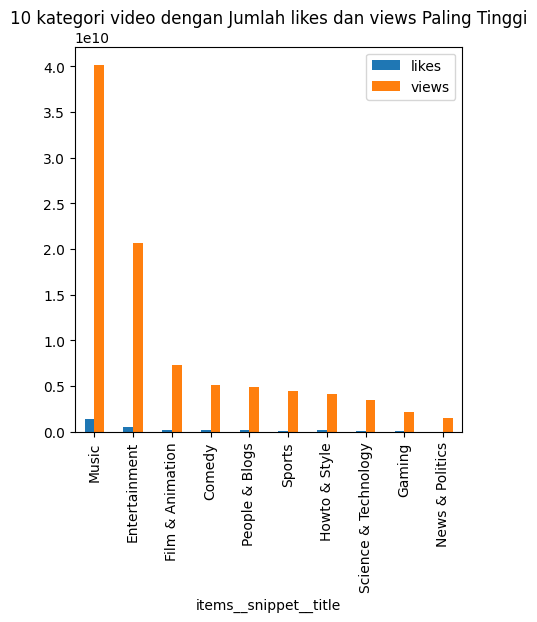

In [883]:
dfb_cat.sort_values(by = ['Total'],ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(5,5), 
title='10 kategori video dengan Jumlah likes dan views Paling Tinggi')
plt.show()

Terlihat dari visualisasi diatas bahwa terjawab pertanyaan 'Kategori apa yang memiliki paling banyak views dan likes?' jawabannya yaitu Music

**Mengecek outlier data berdasarkan likes dan views pada kategori video**


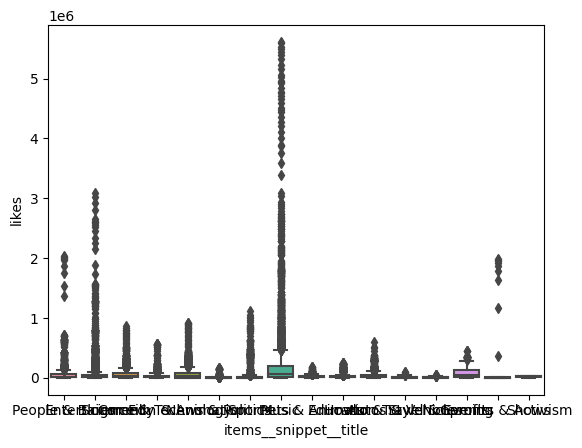

In [884]:
ok = sns.boxplot(x='items__snippet__title', y='likes', data = dfb)

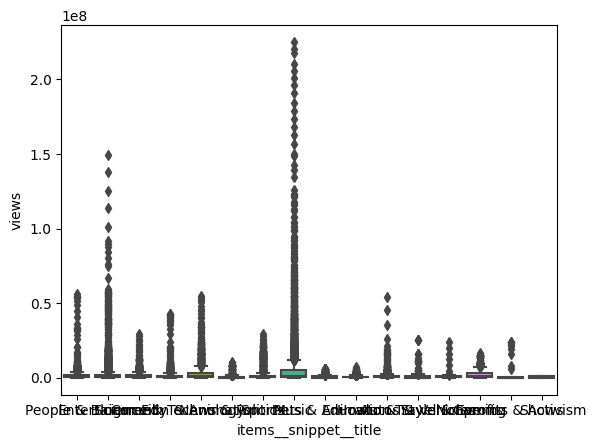

In [885]:
okl = sns.boxplot(x='items__snippet__title', y='views', data = dfb)

setelah melihat sekilas visualisasi boxplot dari data views dan likes menurut kategori video, terlihat bahwa terdapat data yang sangat banyak dan sensitif terhadap outlier, maka untuk melihat distribusi data saya akan menggunakan KS test

In [886]:
ksl = kstest(dfb['likes'], 'norm')
ksv = kstest(dfb['views'], 'norm')

print(ksl)
print(ksv)

KstestResult(statistic=0.9943760066013376, pvalue=0.0, statistic_location=4, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=549, statistic_sign=-1)


Menurut hasil KS test, untuk views dan likes memiliki pvalue dibawah 0,05 sehingga dapat di asumsikan distribusi data tidak normal, oleh karena itu selanjutnya saya akan menggunakan metode statistik non parametrik yaitu kruskal, karena populasi kategori video lebih dari 2.

In [887]:
kl = kruskal(dfb['category_id'],dfb['likes'])
kv = kruskal(dfb['category_id'],dfb['views'])

print(kl)
print(kv)

KruskalResult(statistic=58797.77937340228, pvalue=0.0)
KruskalResult(statistic=61586.929545976716, pvalue=0.0)


terlihat hasil tes kruskal nilai pvalue untuk likes dan views dibawah 0.05 (tolak H0), terjawab pertanyaan nomor 2, 'apakah kategori video dapat diasumsikan mampu mempengaruhi views dan likes?' jawabannya adalah dapat diasumsikan kategori video dapat mempengaruhi likes dan views

# Berdasarkan ketersediaan fitur yang disediakan creator video :

Berikutnya, saya akan analisis fitur-fitur yang dapat disediakan creator video, fitur-fitur tersebut adalah comments_disabled, ratings_disabled, video_error_or_removed, dan description_flag.

Kita dapat menjawab beberapa pertanyaan untuk analisis kali ini:
1. Fitur apa yang paling tinggi likes dan views nya apabila fitur disediakan?
2. apakah fitur-fitur tersebut dapat diasumsikan dapat mempengaruhi likes dan views?

In [888]:
#true = fitur tidak disediakan, false = fitur disediakan

dfb_fit = pd.pivot_table(dfb, index= ['comments_disabled'], values= ['views','likes'], aggfunc= np.sum)
dfb_fit ['Total'] = dfb_fit.sum(axis=1)
dfb_fit.sort_values ('Total', ascending=False)

,likes,views,Total
comments_disabled,,,
False,3027572377,95077405650,98104978027
True,13574821,1594364502,1607939323


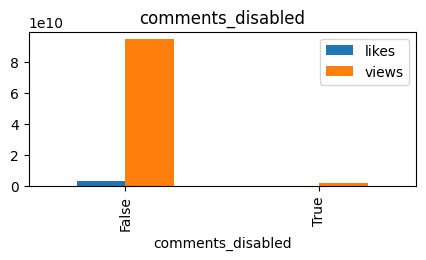

In [889]:
dfb_fit.sort_values(by = ['Total'],ascending=False).drop(columns='Total').plot(kind='bar',figsize=(5,2), 
title='comments_disabled')
plt.show()

In [890]:
klc = kruskal(dfb['comments_disabled'],dfb['likes'])
kvc = kruskal(dfb['comments_disabled'],dfb['views'])

print(klc)
print(kvc)

KruskalResult(statistic=69269.03651698567, pvalue=0.0)
KruskalResult(statistic=69742.52908510795, pvalue=0.0)


In [891]:
#true = fitur tidak disediakan, false = fitur disediakan

dfb_fitr = pd.pivot_table(dfb, index= ['ratings_disabled'], values= ['views','likes'], aggfunc= np.sum)
dfb_fitr ['Total'] = dfb_fitr.sum(axis=1)
dfb_fitr.sort_values ('Total', ascending=False)

,likes,views,Total
ratings_disabled,,,
False,3041147198,95974743986,99015891184
True,0,697026166,697026166


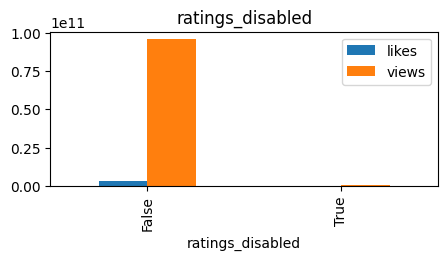

In [892]:
dfb_fitr.sort_values(by = ['Total'],ascending=False).drop(columns='Total').plot(kind='bar',figsize=(5,2), 
title='ratings_disabled')
plt.show()

In [893]:
klr = kruskal(dfb['ratings_disabled'],dfb['likes'])
kvr = kruskal(dfb['ratings_disabled'],dfb['views'])

print(klr)
print(kvr)

KruskalResult(statistic=69608.61031169801, pvalue=0.0)
KruskalResult(statistic=70073.99667390512, pvalue=0.0)


In [894]:
#true = fitur disediakan (video di removed/error), false = fitur tidak disediakan (video aman dapat ditonton selalu)

dfb_fitv = pd.pivot_table(dfb, index= ['video_error_or_removed'], values= ['views','likes'], aggfunc= np.sum)
dfb_fitv ['Total'] = dfb_fitv.sum(axis=1)
dfb_fitv.sort_values ('Total', ascending=False)

,likes,views,Total
video_error_or_removed,,,
False,3040025478,96633657080,99673682558
True,1121720,38113072,39234792


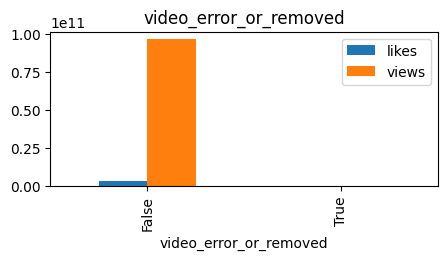

In [895]:
dfb_fitv.sort_values(by = ['Total'],ascending=False).drop(columns='Total').plot(kind='bar',figsize=(5,2), 
title='video_error_or_removed')
plt.show()

In [896]:
klv = kruskal(dfb['video_error_or_removed'],dfb['likes'])
kvv = kruskal(dfb['video_error_or_removed'],dfb['views'])

print(klv)
print(kvv)

KruskalResult(statistic=69717.730933815, pvalue=0.0)
KruskalResult(statistic=70180.54437805887, pvalue=0.0)


In [897]:
#true = fitur disediakan, false = fitur tidak disediakan

dfb_fitd = pd.pivot_table(dfb, index= ['description_flag'], values= ['views','likes'], aggfunc= np.sum)
dfb_fitd ['Total'] = dfb_fitd.sum(axis=1)
dfb_fitd.sort_values ('Total', ascending=False)

,likes,views,Total
description_flag,,,
True,3012950667,95732096547,98745047214
False,28196531,939673605,967870136


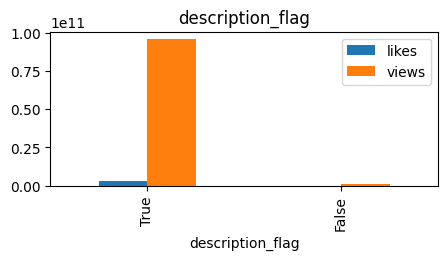

In [898]:
dfb_fitd.sort_values(by = ['Total'],ascending=False).drop(columns='Total').plot(kind='bar',figsize=(5,2), 
title='description_flag')
plt.show()

In [899]:
kld = kruskal(dfb['description_flag'],dfb['likes'])
kvd = kruskal(dfb['description_flag'],dfb['views'])

print(kld)
print(kvd)

KruskalResult(statistic=68606.32704308079, pvalue=0.0)
KruskalResult(statistic=69786.90231086656, pvalue=0.0)


dari hasil analisis tiap fitur diatas, terjawab untuk beberapa pertanyaan berikut :
1. Fitur apa yang paling tinggi likes dan views nya apabila fitur diaktifkan? 
jawaban : terlihat untuk total views dan likes dari fitur video error / removed yang false adalah yang terbanyak (99673682558), diikuti dengan rating (99015891184), deskripsi (98745047214), dan comment (98104978027). 
2. apakah fitur-tersebut dapat diasumsikan dapat mempengaruhi likes dan views?
jawaban : berdasarkan test kruskal pada semua fitur, terlihat semua fitur memiliki pvalue <0.05 yang artinya H0 ditolak, artinya semua fitur dapat diasumsikan dapat mempengaruhi likes dan views, namun berdasarkan analisis, fitur video error/ removed memiliki pengaruh paling besar diantara 3 fitur lainnya. Artinya pertama kali perusahaan harus mempelajari bagaimana cara nya agar video yang di upload tidak akan error / di hilangkan oleh youtube, kemudian mempelajari 3 fitur lainnya.

# Berdasarkan waktu upload video

Berikutnya, saya akan analisis terkait waktu upload video, yaitu berdasarkan publish_day dan publish_hour

pada analisis ini kita dapat menjawab beberapa pertanyaan :
1. Pada hari apa upload video yang paling banyak mendapatkan likes dan views?
2. Pada jam berapa upload video yang paling banyak mendapatkan likes dan views?

In [900]:
#Berdasarkan hari
dfb_upd = pd.pivot_table(dfb, index= ['publish_day'], values= ['views','likes'], aggfunc= np.sum)
dfb_upd ['Total'] = dfb_upd.sum(axis=1)
dfb_upd.sort_values ('Total', ascending=False)

,likes,views,Total
publish_day,,,
Friday,773185360,23622601358,24395786718
Thursday,532821773,16089783826,16622605599
Tuesday,444856112,13938147018,14383003130
Wednesday,403181609,13644783188,14047964797
Monday,357060219,12299195247,12656255466
Sunday,338324561,10864844777,11203169338
Saturday,191717564,6212414738,6404132302


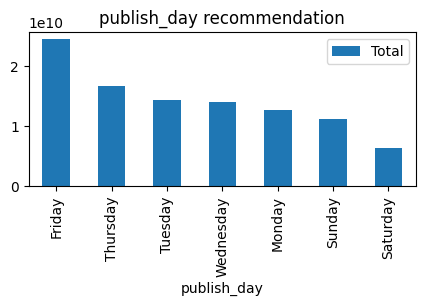

In [901]:
dfb_upd.sort_values(by = ['Total'], ascending=False).drop(columns=['likes','views']).plot(kind='bar',figsize=(5,2), 
title='publish_day recommendation')
plt.show()

dari analisis publish_day, kita dapat menjawab pertanyaan 'Pada hari apa upload video yang paling banyak mendapatkan likes dan views?' yaitu hari friday (jumat)


In [902]:
#Berdasarkan jam
dfb_uph = pd.pivot_table(dfb, index= ['publish_hour'], values= ['views','likes'], aggfunc= np.sum)
dfb_uph ['Total'] = dfb_uph.sum(axis=1)
dfb_uph.sort_values ('Total', ascending=False)

,likes,views,Total
publish_hour,,,
4,274128766,9267508289,9541637055
16,247364503,7228406640,7475771143
14,203415408,7056250352,7259665760
15,297480819,6932449152,7229929971
13,156406979,5940829212,6097236191
17,179992054,5528234324,5708226378
18,156399647,5075077109,5231476756
12,121373441,4830046020,4951419461
21,165546741,4398122337,4563669078


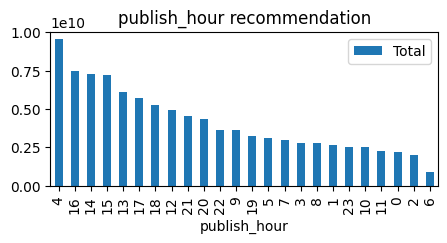

In [903]:
dfb_uph.sort_values(by = ['Total'], ascending=False).drop(columns=['likes','views']).plot(kind='bar',figsize=(5,2), 
title='publish_hour recommendation')
plt.show()

dari analisis publish_hour, kita dapat menjawab pertanyaan 'Pada jam berapa upload video yang paling banyak mendapatkan likes dan views?' yaitu pada jam 4 pagi.

# Kesimpulan dan rekomendasi

dari analisis yang telah dilakukan, kita bisa membuat kesimpulan terkait faktor-faktor yang dapat mempengaruhi likes dan views pada suatu video trending:

**Kesimpulan**

- Dari 16 kategori video yang tersedia pada database, kategori 'Music' merupakan kategori dengan likes dan views terbesar
- Pada fitur video yang dapat disediakan creator video, fitur video error/ removed memiliki pengaruh paling besar diantara 3 fitur lainnya. dengan detail video error / removed (99673682558), diikuti dengan rating (99015891184), deskripsi (98745047214), dan comment (98104978027). 
- berdasarkan waktu upload, pada hari jumat dan jam 4 adalah waktu terbaik untuk upload video karena pada waktu tersebut memiliki likes dan views terbanyak.

**Rekomendasi**
1. Kategori video harus di tentukan di awal pembuatan video, sebaiknya memilih 'Music' sebagai kategori video, berarti perusahaan dapat membuat lagu atau ber kolaborasi dengan musisi US untuk membuat Music video yang melibatkan produk baru dan brand perusahaan.
2. Sebelum upload video, perusahaan perlu mempelajari hal-hal yang menyebabkan video error / removed oleh youtube, karena jika video error / removed, kesempatan mendapatkan likes dan views yang banyak menjadi lebih sedikit.
3. Tidak lupa untuk mengaktifkan fitur rating, comment, dan juga memberikan deskripsi video agar perusahaan dapat berkomunikasi dengan calon penonton dan dapat meningkatkan brand image.
4. Upload video pada hari jumat jam 4 pagi adalah waktu terbaik untuk berkesempatan mendapatkan likes dan views yang banyak

In [904]:
dfb.to_csv(r'C:\Users\Ilham Muhammaddin\visual data purwadhika\capstone modul 2\capstone2fortableu.csv', index= None, header=True)